In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import rc

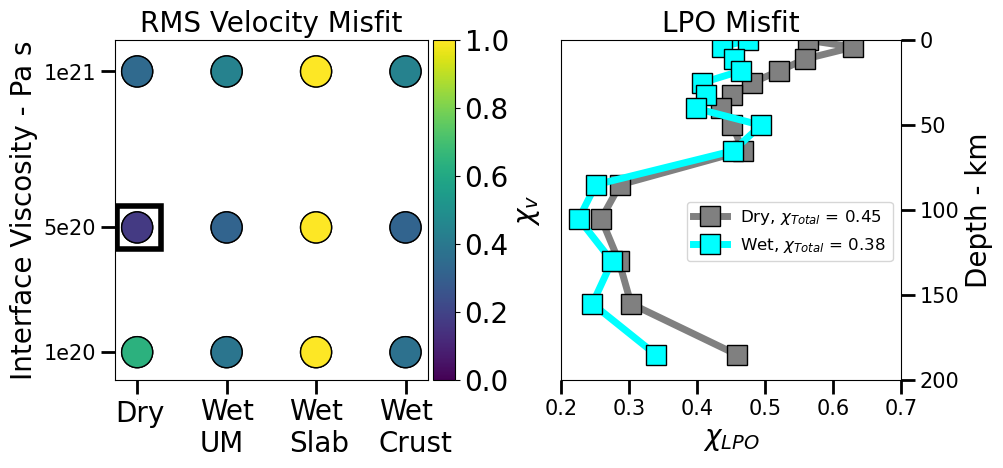

In [2]:
top_panel_width = 0.4
top_panel_height = 0.4

bot_panel_width = top_panel_width
bot_panel_height = 0.4

top_panel_dim = [0, 0, top_panel_width, top_panel_height]
bot_panel_dim = [top_panel_width + 0.125, 0, bot_panel_width, bot_panel_height]

fig = plt.figure(dpi=100, figsize=(8.5, 8.5))
left_plot = plt.axes(top_panel_dim)
right_plot = plt.axes(bot_panel_dim)

interface_viscosities = np.array([1e20, 5e20, 1e21])

# 1 is DRY
# 2 is WET MANTLE
# 3 is WET SLAB
# 4 is WET CRUST
rheology_index = np.array([1, 2, 3, 4])

ERRORS_PC = np.array([[0.64, 0.17, 0.34], \
                      [0.39, 0.32, 0.44], \
                      [3.44, 1.66, 1.12], \
                      [0.37, 0.32, 0.44]])

LPO_misfit_depths = np.array([  0,   4,  11,  18,  25,  32,  40,  50,  65,  85, 105, 130, 155, 185])

wet_LPO_misfit_depth = np.array([0.4744177527940029, 0.4362845273273233, 0.45400145017236615, 0.46451306488926797, \
                                 0.4077557280479984, 0.41319831348180797, 0.39803965303065586, 0.494153810895552, \
                                 0.4530002471467303, 0.25108703823391276, 0.22600645771915207, 0.274949840758327, \
                                 0.24606826803267, 0.33960032356633196])

dry_LPO_misfit_depth = np.array([0.5630198902520325, 0.6300373126928153, 0.5592808499195806, 0.5208128157240486, 0.48063237407778453, \
                                 0.4511691507476984, 0.43558685209364495, 0.4518904179573061, 0.46778580784458645, 0.28674866144336103, \
                                 0.25905765839688527, 0.28509558566360615, 0.30293995635331705, 0.45886158253800907])

RHEOLOGY_PC, INTERFACE_VISCOSITY_PC = np.meshgrid(rheology_index, interface_viscosities, indexing="ij")

rect = patches.Rectangle((0.77, 4.3e20), 0.5, 1.4e20, linewidth=4, edgecolor='black', facecolor='none')
left_plot.add_patch(rect)

left_plot.scatter(RHEOLOGY_PC.flatten(), INTERFACE_VISCOSITY_PC.flatten(), c=ERRORS_PC.flatten(), \
                  edgecolor='black', s=500, vmin=0, vmax=1)

im = left_plot.scatter(RHEOLOGY_PC.flatten(), INTERFACE_VISCOSITY_PC.flatten(), c=ERRORS_PC.flatten(), \
                       edgecolor='black', s=500, vmin=0, vmax=1)

divider = make_axes_locatable(left_plot)
cax = divider.append_axes('right', size='7%', pad=0.05)
cbar = fig.colorbar(im, cax=cax, orientation='vertical')
cbar.set_label('$\chi_{v}$', size=20)
cbar.ax.tick_params(labelsize=20) 

left_plot.set_xticks([1, 2, 3, 4])
left_plot.set_yticks([1e20, 5e20, 1e21])
left_plot.set_xlim(0.75, 4.25)
left_plot.set_ylim(1e19, 1.1e21)
left_plot.tick_params(axis='x', labelsize=0, direction='out', length=10, width=2)
left_plot.tick_params(axis='y', labelsize=15, direction='out', length=10, width=2, \
                      left=True, right=False, labelleft=True, labelright=False)
left_plot.text(0.75, -1.25e20, "Dry", fontsize=20)
left_plot.text(1.7, -2.2e20, "Wet\nUM", fontsize=20)
left_plot.text(2.7, -2.2e20, "Wet\nSlab", fontsize=20)
left_plot.text(3.7, -2.2e20, "Wet\nCrust", fontsize=20)
left_plot.set_ylabel('Interface Viscosity - Pa s',fontsize=20)
left_plot.set_title("RMS Velocity Misfit", fontsize=20)
left_plot.ticklabel_format(axis='y', style='plain')
a = left_plot.get_yticks().tolist()
a[0]='1e20'
a[1]='5e20'
a[2]='1e21'
left_plot.set_yticklabels(a)
# left_plot.yaxis.major.formatter._useMathText = True
# left_plot.yaxis.offsetText.set_fontsize(18)
# rc('text', usetex=True)

right_plot.plot(dry_LPO_misfit_depth, LPO_misfit_depths, lw=5, markerfacecolor='gray', markeredgecolor='black',
                color='gray', marker='s', markersize=15, label="Dry, $\chi_{Total}$ = 0.45")
right_plot.plot(wet_LPO_misfit_depth, LPO_misfit_depths, lw=5, markerfacecolor='cyan', markeredgecolor='black',
                color='cyan', marker='s', markersize=15, label="Wet, $\chi_{Total}$ = 0.38")
right_plot.set_xticks([0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
right_plot.set_yticks([0, 50, 100, 150, 200])
right_plot.set_xlim(0.2, 0.7)
right_plot.set_ylim(0, 200)
right_plot.tick_params(axis='x', labelsize=15, direction='out', length=10, width=2)
right_plot.tick_params(axis='y', labelsize=15, direction='out', length=10, width=2, \
                       left=False, right=True, labelleft=False, labelright=True)
right_plot.set_ylabel('Depth - km', fontsize=20)
right_plot.yaxis.set_label_position("right")
right_plot.set_xlabel('$\chi_{LPO}$', fontsize=20)
right_plot.set_title("LPO Misfit", fontsize=20)
right_plot.legend(fontsize=12, bbox_to_anchor=(0.5, 0., 0.5, 0.55))
right_plot.invert_yaxis()
plt.savefig('model_error_plot.png', bbox_inches='tight')
plt.show()